## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/ds4e/knn`

**Q0.**
1. What is the difference between regression and classification?


Regression predicts a continuous output, while classification predicts discrete class labels. Regression also estimates a numerical relationship between input and output, whereas classification assigns data points to predefined categories.



2. What is a confusion table? What does it help us understand about a model's performance?


A confusion table is a matrix that summarizes a classification model’s performance by showing the number of true positives, false positives, true negatives, and false negatives. It helps evaluate accuracy, precision, recall, and other metrics, providing insight into how well a model distinguishes between classes.

3. What does the SSE quantify about a particular model?


SSE quantifies the total squared difference between actual and predicted values in a regression model. A lower SSE indicates better model fit, while a higher SSE suggests greater prediction error.

4. What are overfitting and underfitting? 


Overfitting occurs when a model learns noise and patterns specific to the training data, leading to poor generalization on new data. Underfitting happens when a model is too simple and fails to capture important patterns in the data, resulting in high error on both training and test sets.

5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?


Splitting data into training and testing sets ensures that a model is evaluated on unseen data, preventing overfitting. Selecting 
𝑘 based on test set accuracy or SSE helps optimize model complexity, improving generalization.

6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

Reporting a class label provides a clear decision but lacks uncertainty information, which can be misleading if the model is unsure. A probability distribution over class labels gives confidence levels for each prediction, allowing for threshold adjustments and better handling of uncertain cases, though it may be harder to interpret in some applications.

**Q1.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.

In [3]:
import pandas as pd
import numpy as np

file_path = "../data/USA_cars_datasets.csv"
df = pd.read_csv(file_path)

# keeping only 'price', 'year', and 'mileage'
df = df[['price', 'year', 'mileage']]

# checking for NAs
missing_values = df.isna().sum()

print(missing_values) # there are no missing vlaues to handle
print("Dimensions:", df.shape)
print(df.head())

price      0
year       0
mileage    0
dtype: int64
Dimensions: (2499, 3)
   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654


2. Maxmin normalize `year` and `mileage`.


In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df[['year', 'mileage']] = scaler.fit_transform(df[['year', 'mileage']])
df.head()

,price,year,mileage
0,6300,0.744681,0.269287
1,2899,0.808511,0.187194
2,5350,0.957447,0.038892
3,25000,0.872340,0.063016
4,27700,0.957447,0.006537


3. Split the sample into ~80% for training and ~20% for evaluation.


In [5]:
from sklearn.model_selection import train_test_split

train_df, eval_df = train_test_split(df, test_size=0.2, random_state=42)

print("Training Set:\n", train_df.head())
print("Evaluation Set:\n", eval_df.head())

Training Set:
       price      year   mileage
109   23100  0.957447  0.048624
2296   8000  0.957447  0.053728
354       0  0.765957  0.177186
266   17100  0.978723  0.015502
2102  16300  0.957447  0.068256
Evaluation Set:
       price      year   mileage
2319  11390  0.893617  0.037284
1865  27900  0.978723  0.028412
902    2500  0.851064  0.160383
2240  10900  0.978723  0.030490
1285  23600  0.978723  0.013229


4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?

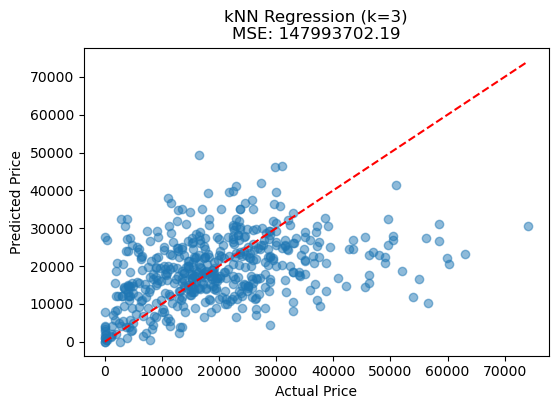

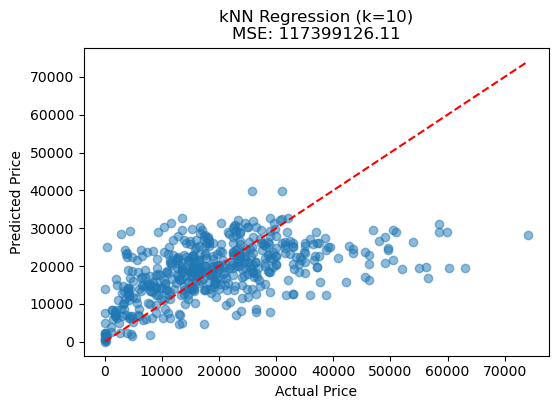

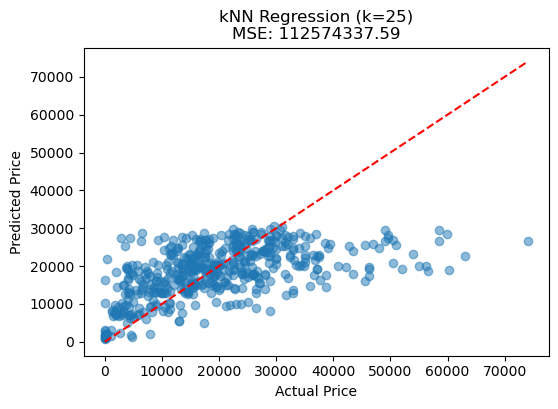

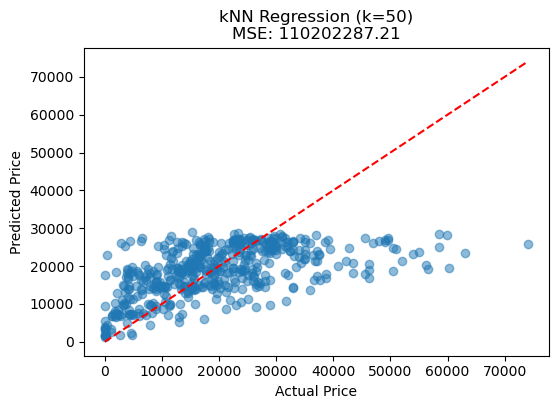

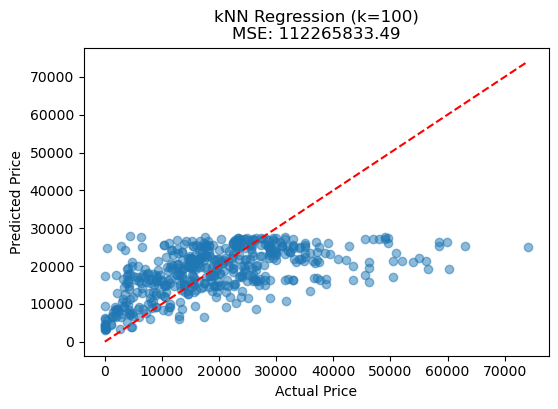

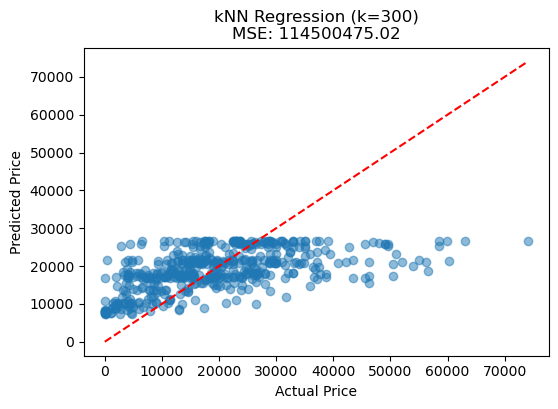

Mean Squared Errors for different k values:
k = 3: MSE = 147993702.19
k = 10: MSE = 117399126.11
k = 25: MSE = 112574337.59
k = 50: MSE = 110202287.21
k = 100: MSE = 112265833.49
k = 300: MSE = 114500475.02


In [6]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

X_train = train_df[['year', 'mileage']]
y_train = train_df['price']
X_test = eval_df[['year', 'mileage']]
y_test = eval_df['price']

k_values = [3, 10, 25, 50, 100, 300]

mse_results = {}

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_results[k] = mse

    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"kNN Regression (k={k})\nMSE: {mse:.2f}")
    plt.show()

print("Mean Squared Errors for different k values:")
for k, mse in mse_results.items():
    print(f"k = {k}: MSE = {mse:.2f}")

The MSE value decreases as k increases until k=50. Then, the MSE values increase with an increasing k. 


5. Determine the optimal $k$ for these data.


The lowest MSE accompanies k = 50, making it the optimal k for this data. 

6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

For small k values, such as 3 or 10, overfitting occurs. The predictions are highly scattered and noisy because the model is too sensitive to individual data points, causing high variance. As k increases (25, 50), the predictions are within a more optimal range. The predictions become smoother and more aligned with the actual values since the model generalizes better, balancing bias and variance. For k=100 and k=300, the predictions become overly smoothed and converge toward a mean price as a result of underfitting. The model loses its ability to capture important variations in the data and the MSE starts increasing again, as the model is too simplistic.

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on. 

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `cars_env.csv` data. 

The variables that go into the model are one more dimension to think about: We can use the train-test split approach to pick the variables that go into the model, not just the number of neighbors.

1. Load the data. We're going to use `footprint`, `baseline mpg`, `baseline price`, and `baseline sales`. Prepare some EDA results for these variables: describe tables, histograms/kernel density plots, scatterplots, etc. I renamed these variables to `footprint`, `mpg`, `price`, and `sales` to save time.
2. Maxmin normalize `footprint`, `mpg`, and `price`. These will be our features/covariates $X$. Our target/dependent/outcome variable $y$ will be sales. Does it make sense to normalize $y$?
3. Make a 30% train-test split of the data into 30% test/validation data and 70% training data. 
4. Using all three covariates --- `footprint`, `mpg`, and `price` --- what's the best $k$ to use? What SSE is achieved on the test set? To answer these questions, evalute the sum of squared error on the test set for a reasonable range of values of $k$ (perhaps 2 to 150), and find the $k$ with the lowest SSE. 
5. Do part 4 again, for each pair of variables: `footprint` and `mpg`, `footprint` and `price`, `mpg` and `price`.
6. Which set of variables from parts 4 and 5 does the best, in terms of minimizing SSE at the optimal choice of neighbors? Explain.

**Q4.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the features.
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

**Q5.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q6.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings. 
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.